In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [88]:
data = pd.read_csv("Internet.csv", encoding='gb2312')
data

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
0,全国总计,53578.7,5223.7,50550.6,5136.2,46408.3,3585.4,3458.6,2818.6,37808.2,15770.5
1,东部地区,22948.5,1999.5,21436.2,1999.3,19353.0,1035.2,1924.4,1624.0,16264.8,6683.8
2,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0
3,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8
4,河北,2796.9,262.5,2666.9,303.9,2335.9,130.7,177.2,166.9,1664.1,1132.8
5,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9
6,江苏,4071.6,314.8,3767.8,305.3,3220.5,38.9,511.4,394.5,2510.9,1560.7
7,浙江,3117.0,178.2,2838.6,145.7,2621.0,46.0,275.5,219.8,2191.8,925.3
8,福建,1985.1,154.1,1841.4,151.9,1785.6,213.2,62.0,59.9,1383.8,601.4
9,山东,3863.7,418.1,3656.8,454.0,3516.4,334.7,242.1,239.9,2736.1,1127.6


In [89]:
# data.loc[(data['地区'] == '东部地区' or data['地区'] == '中部地区' or data['地区'] == '西部地区' or data['地区'] == '东部地区')]

data_all = pd.concat([data.loc[data['地区'] == district] for district in ['全国总计', '东部地区', '中部地区', '西部地区', '东北地区']], ignore_index=True)
data_all

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
0,全国总计,53578.7,5223.7,50550.6,5136.2,46408.3,3585.4,3458.6,2818.6,37808.2,15770.5
1,东部地区,22948.5,1999.5,21436.2,1999.3,19353.0,1035.2,1924.4,1624.0,16264.8,6683.8
2,中部地区,13296.5,1366.6,12672.2,1328.7,11905.2,1123.5,611.2,554.8,9140.1,4156.4
3,西部地区,14121.0,1516.7,13400.2,1472.3,12190.0,1084.3,888.5,607.9,9661.6,4459.4
4,东北地区,3212.7,340.9,3042.0,335.9,2960.1,342.4,34.5,31.8,2741.8,470.9


In [90]:
data = data.drop([0, 1, 12, 19, 32])
data = data.reset_index(drop=True)
data

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
0,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0
1,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8
2,河北,2796.9,262.5,2666.9,303.9,2335.9,130.7,177.2,166.9,1664.1,1132.8
3,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9
4,江苏,4071.6,314.8,3767.8,305.3,3220.5,38.9,511.4,394.5,2510.9,1560.7
5,浙江,3117.0,178.2,2838.6,145.7,2621.0,46.0,275.5,219.8,2191.8,925.3
6,福建,1985.1,154.1,1841.4,151.9,1785.6,213.2,62.0,59.9,1383.8,601.4
7,山东,3863.7,418.1,3656.8,454.0,3516.4,334.7,242.1,239.9,2736.1,1127.6
8,广东,4277.7,387.7,3950.0,362.7,3509.2,99.1,364.1,326.4,3243.7,1034.1
9,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4


In [101]:
data1 = data.sort_values(by=['2021年宽带接入'])
data1

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
22,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2
25,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2
26,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2
9,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4
1,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8
29,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1
16,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7
0,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0
3,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9
30,黑龙江,1013.5,127.2,935.8,111.6,953.5,126.6,7.9,7.4,8308.0,182.7


In [98]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

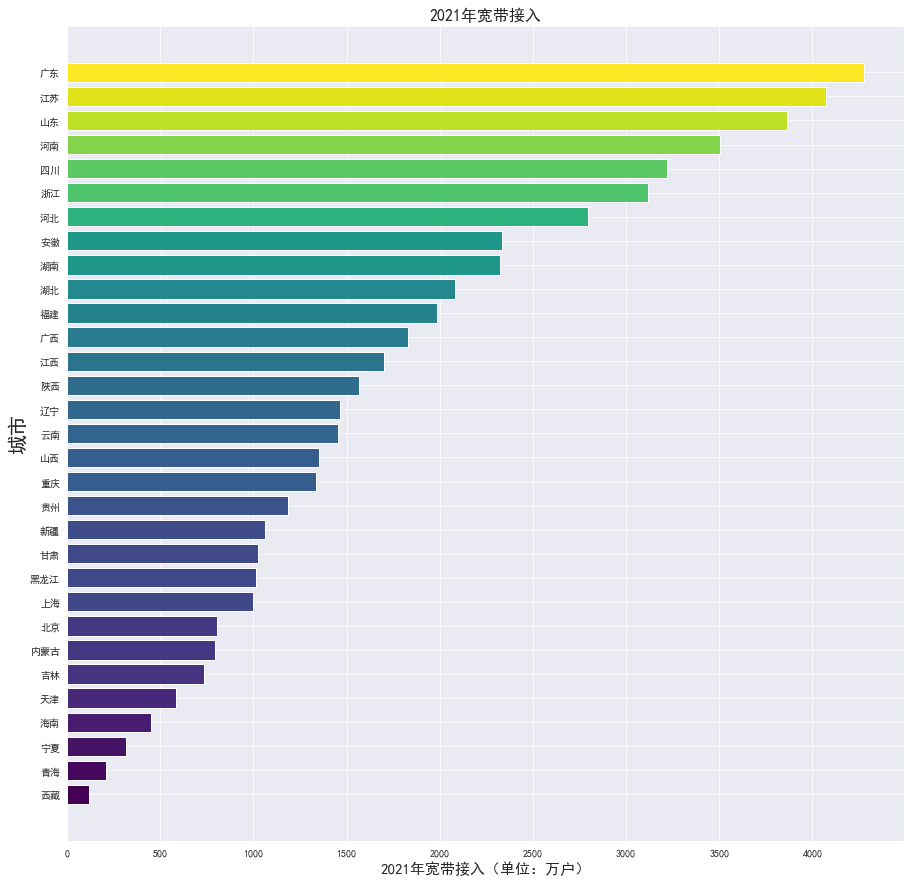

In [118]:
lst = list(data1['2021年宽带接入'])
lst1 = list(data1['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(15, 15))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年宽带接入（单位：万户）', fontdict={'size':15})
plt.title('2021年宽带接入', fontdict={'size':16})
plt.show()

In [121]:
data2 = data.sort_values(by='2021年FTTH/0用户').reset_index(drop=True)
data2

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2
1,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2
2,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2
3,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4
4,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8
5,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1
6,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7
7,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0
8,黑龙江,1013.5,127.2,935.8,111.6,953.5,126.6,7.9,7.4,8308.0,182.7
9,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9


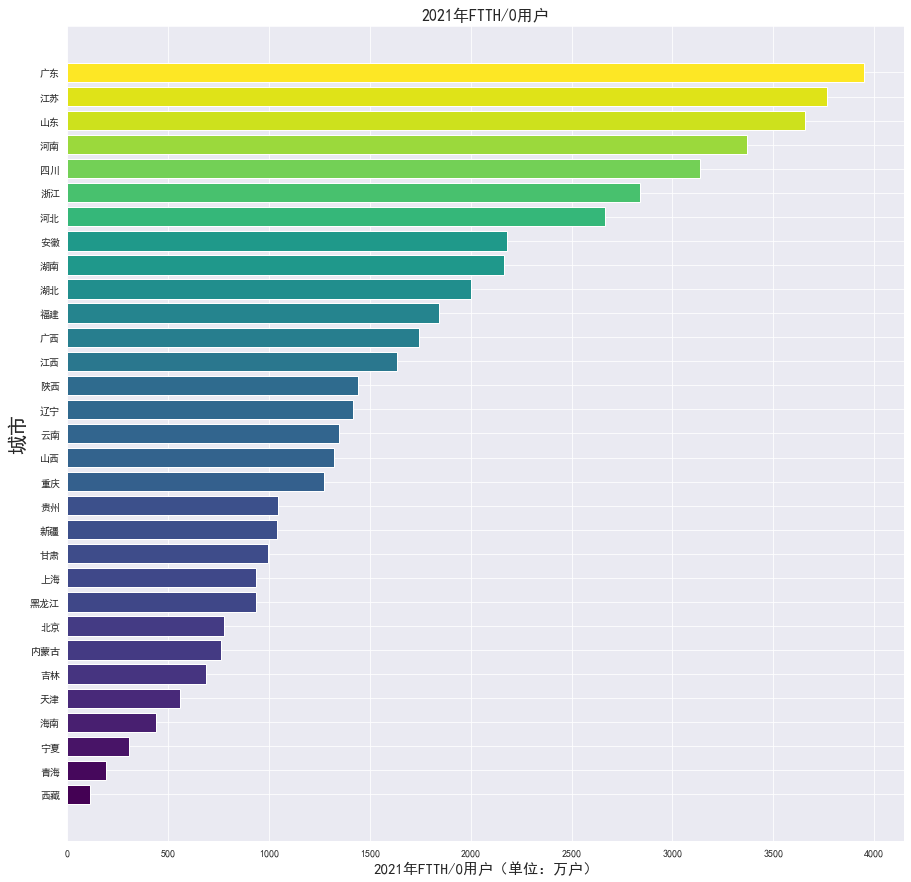

In [127]:
lst = list(data2['2021年FTTH/0用户'])
lst1 = list(data2['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(15, 15))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年FTTH/0用户（单位：万户）', fontdict={'size':15})
plt.title('2021年FTTH/0用户', fontdict={'size':16})
plt.show()

In [134]:
data3 = data.sort_values(by='2021年100M-1000M').reset_index(drop=True)
data3

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2
1,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2
2,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2
3,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4
4,天津,584.5,49.9,559.5,43.5,499.5,-9.9,68.5,64.8,524.8,59.8
5,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1
6,北京,806.3,59.0,777.6,58.2,706.5,52.8,63.5,40.5,713.2,93.0
7,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7
8,上海,995.4,76.5,938.7,76.7,749.0,150.6,31.8,103.3,988.6,6.9
9,甘肃,1025.2,93.8,993.8,97.0,881.2,39.8,75.9,55.3,661.3,364.0


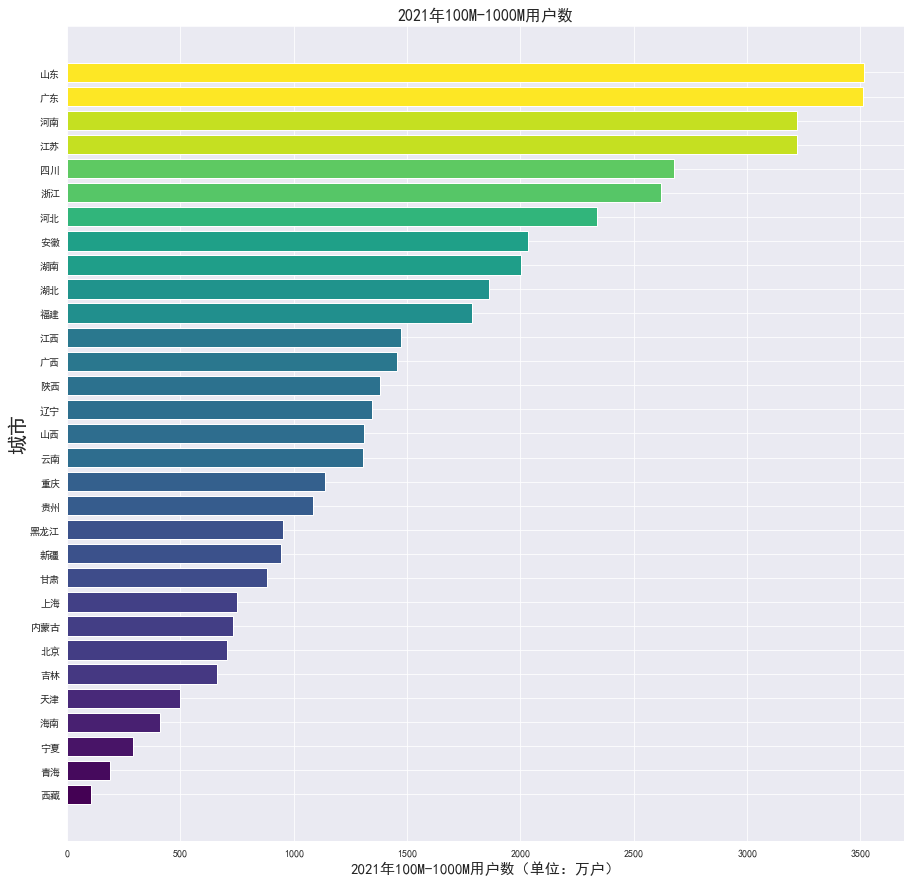

In [129]:
lst = list(data3['2021年100M-1000M'])
lst1 = list(data3['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(15, 15))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年100M-1000M用户数（单位：万户）', fontdict={'size':15})
plt.title('2021年100M-1000M用户数', fontdict={'size':16})
plt.show()

In [137]:
data4 = data.sort_values(by='大于1000M2021年 ').reset_index(drop=True)
data4

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2
1,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1
2,黑龙江,1013.5,127.2,935.8,111.6,953.5,126.6,7.9,7.4,8308.0,182.7
3,山西,1350.4,98.3,1321.5,95.1,1312.0,139.6,8.2,6.3,1098.4,252.0
4,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4
5,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2
6,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7
7,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2
8,辽宁,1464.9,133.7,1416.4,139.2,1344.6,130.5,23.2,21.3,1295.9,169.1
9,新疆,1064.2,180.3,1041.9,184.8,945.9,172.4,28.3,25.1,761.4,302.8


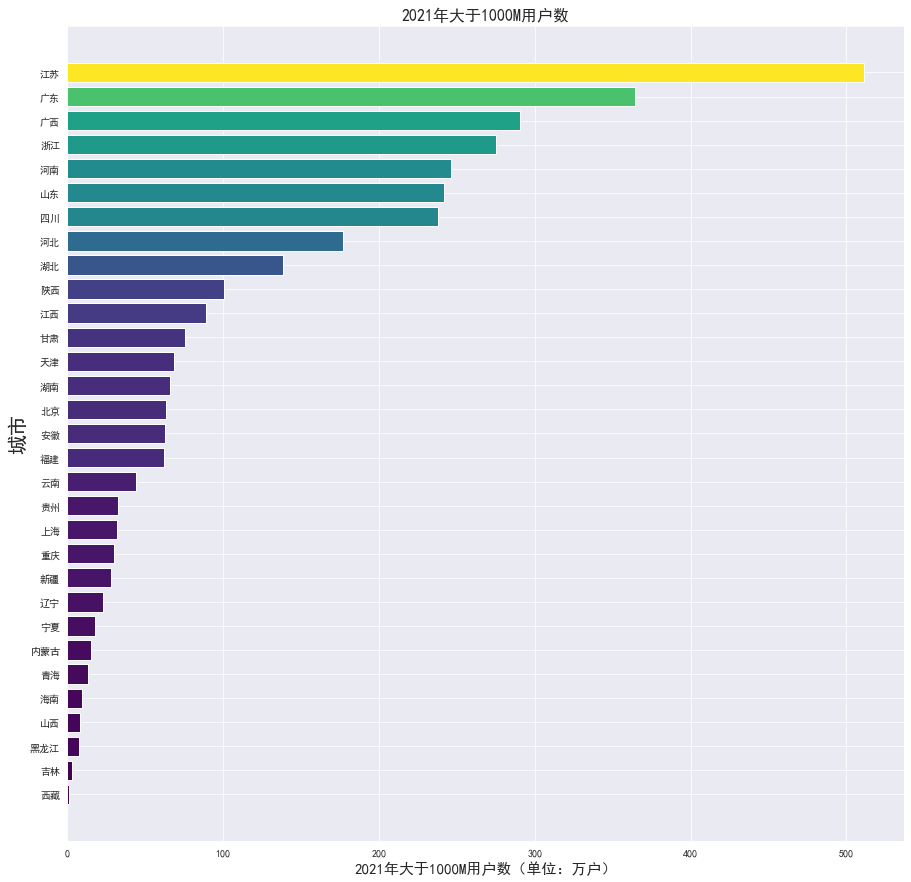

In [138]:
lst = list(data4['大于1000M2021年 '])
lst1 = list(data4['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(15, 15))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年大于1000M用户数（单位：万户）', fontdict={'size':15})
plt.title('2021年大于1000M用户数', fontdict={'size':16})
plt.show()

In [139]:
data5 = data.sort_values(by='2021年城市用户').reset_index(drop=True)
data4

,地区,2021年宽带接入,宽带接入比2020年增减,2021年FTTH/0用户,FTTH/0用户比2020年增减,2021年100M-1000M,100M-1000M比2020年增减,大于1000M2021年,大于1000M比2020年增减,2021年城市用户,2021年城市用户.1
0,西藏,115.3,19.0,112.8,19.7,106.3,21.0,1.2,1.1,78.2,37.2
1,吉林,734.2,80.0,689.8,85.0,662.1,85.3,3.4,3.2,615.1,119.1
2,黑龙江,1013.5,127.2,935.8,111.6,953.5,126.6,7.9,7.4,8308.0,182.7
3,山西,1350.4,98.3,1321.5,95.1,1312.0,139.6,8.2,6.3,1098.4,252.0
4,海南,450.2,98.7,438.9,97.5,409.4,97.9,9.4,8.1,307.8,142.4
5,青海,209.4,27.4,192.8,22.3,191.5,14.7,13.7,12.7,152.1,57.2
6,内蒙古,796.2,73.3,762.5,73.2,731.9,53.6,15.6,14.1,701.5,94.7
7,宁夏,317.1,33.5,309.2,33.2,290.4,15.5,18.1,17.3,246.9,70.2
8,辽宁,1464.9,133.7,1416.4,139.2,1344.6,130.5,23.2,21.3,1295.9,169.1
9,新疆,1064.2,180.3,1041.9,184.8,945.9,172.4,28.3,25.1,761.4,302.8


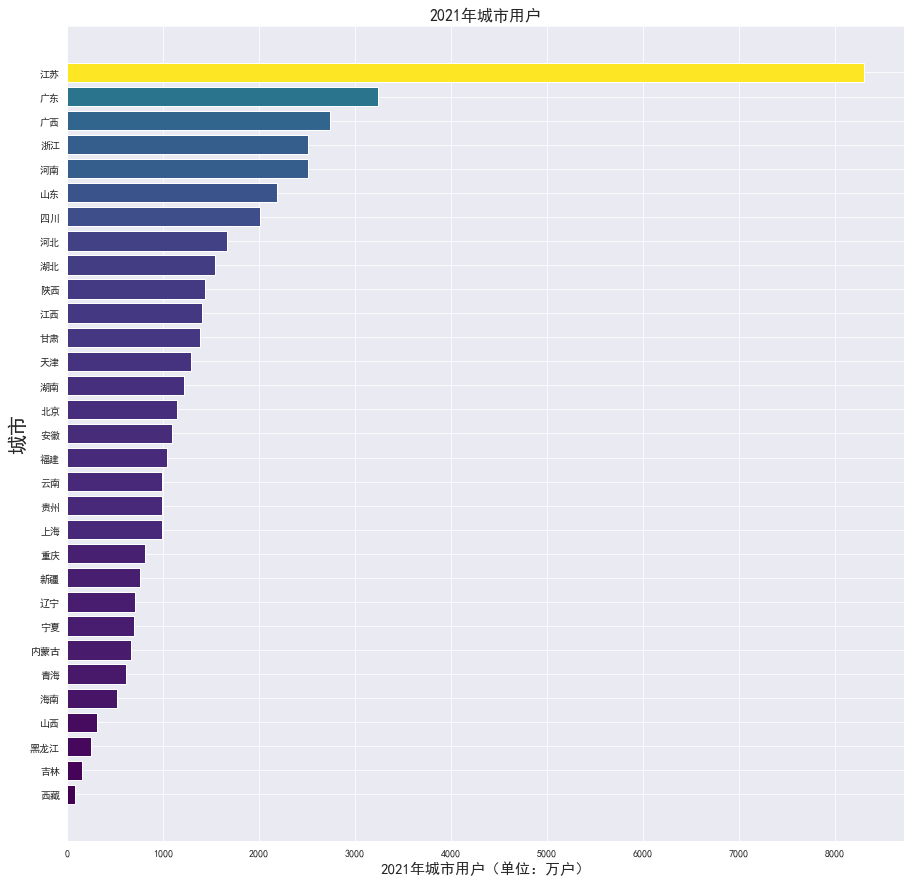

In [140]:
lst = list(data5['2021年城市用户'])
lst1 = list(data4['地区'])
norm = plt.Normalize(min(lst), max(lst))
norm_y = norm(lst)
plt.figure(figsize=(15, 15))
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)
plt.barh(lst1, lst, color=color)
plt.ylabel('城市',fontdict={'size':20})
plt.xlabel('2021年城市用户（单位：万户）', fontdict={'size':15})
plt.title('2021年城市用户', fontdict={'size':16})
plt.show()